In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset

df = pd.read_csv("/kaggle/input/advertisingcsv/Advertising.csv")

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
# To rename the column 'Unnamed: 0' to 'Index'
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [6]:
df.head()

,Index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.isnull().sum()

Index        0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dtypes

Index          int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

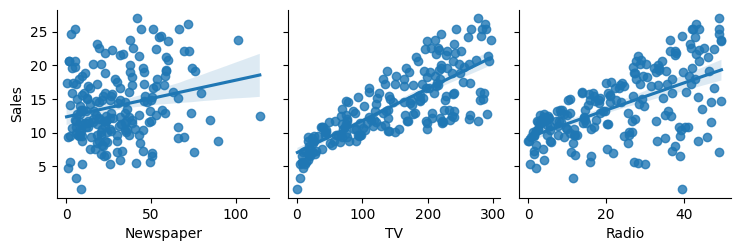

In [11]:
sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales",kind='reg')

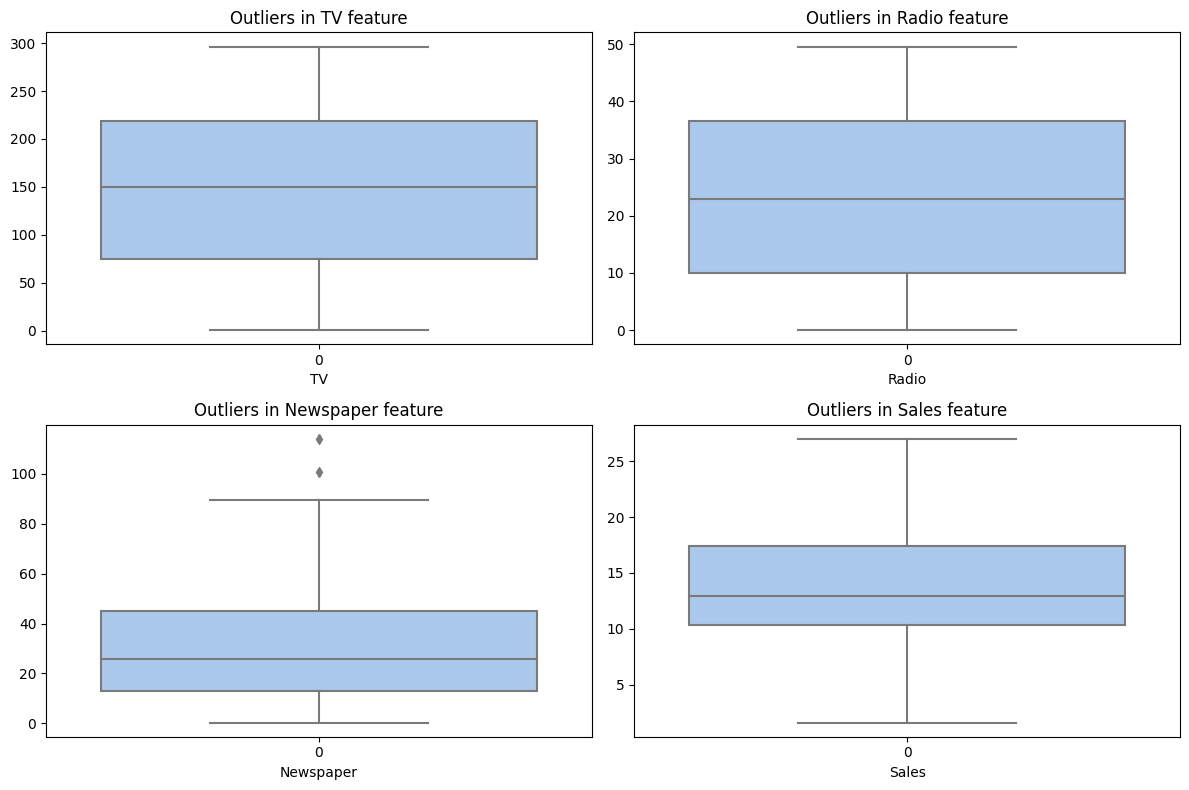

In [12]:
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

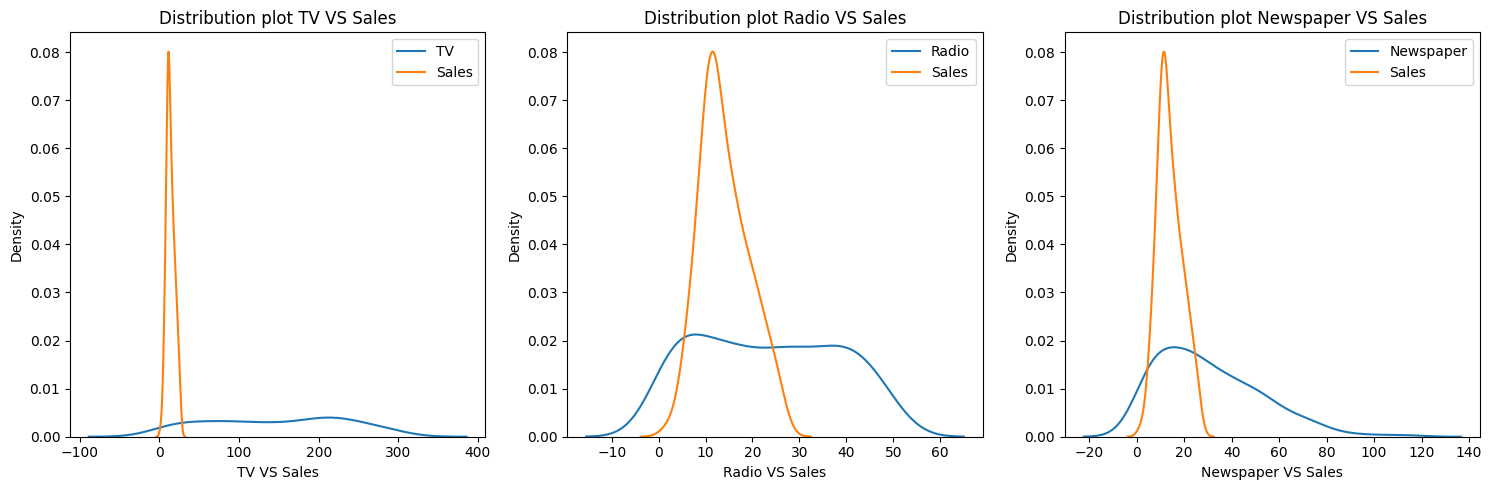

In [13]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

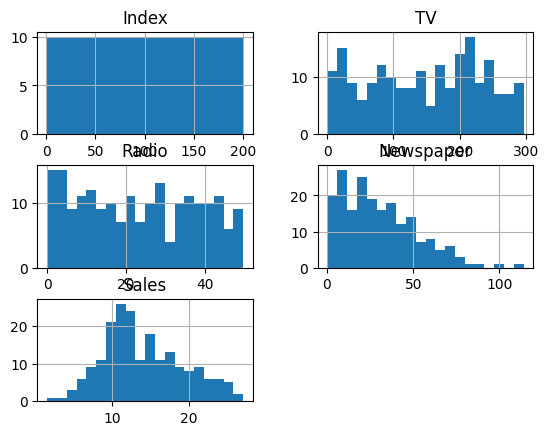

In [14]:
df.hist(bins=20)

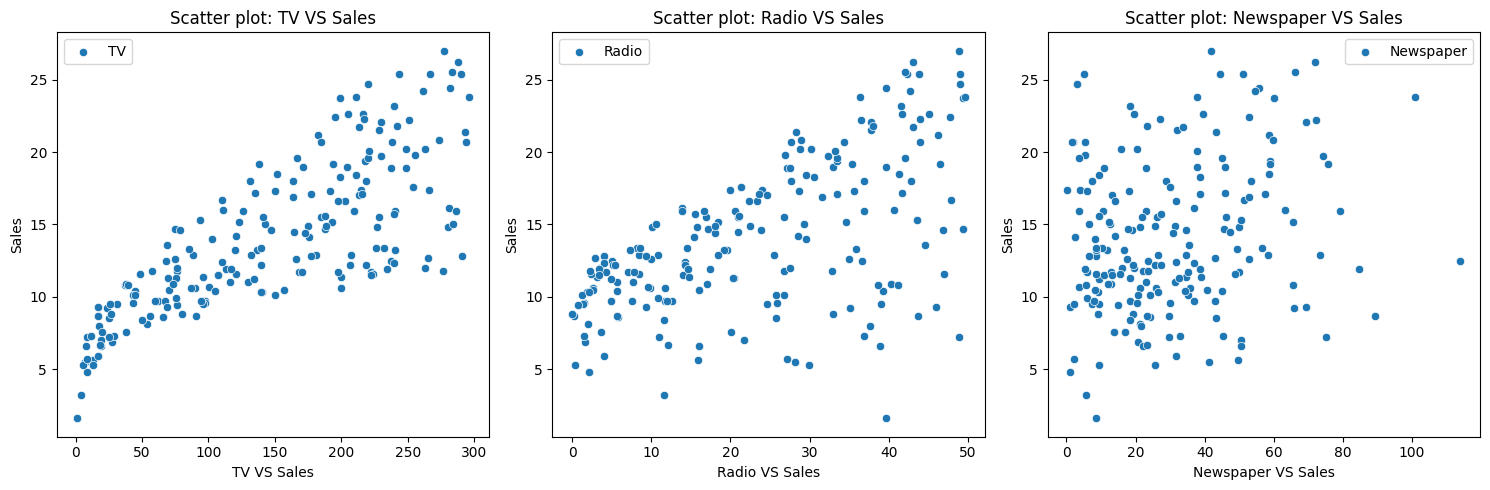

In [15]:
plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

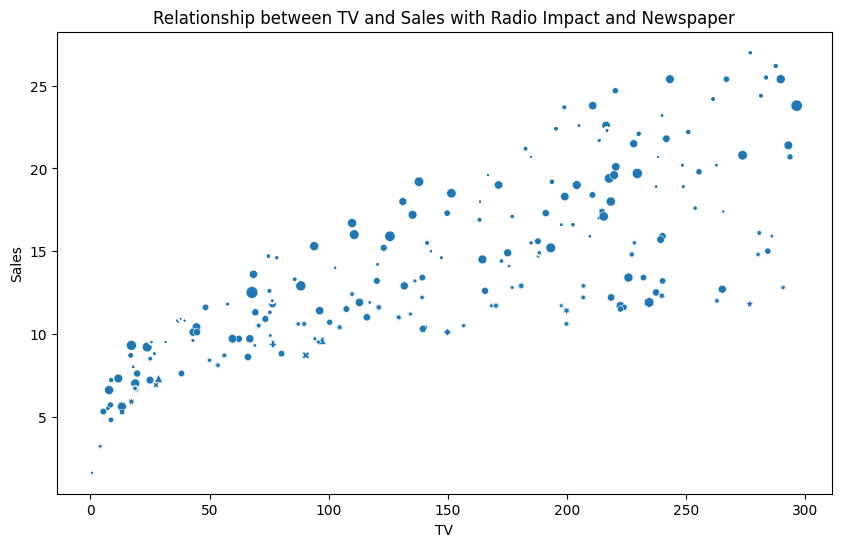

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="TV",y="Sales",style="Radio",size="Newspaper",palette="pastel",legend=False)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Relationship between TV and Sales with Radio Impact and Newspaper")
plt.show()

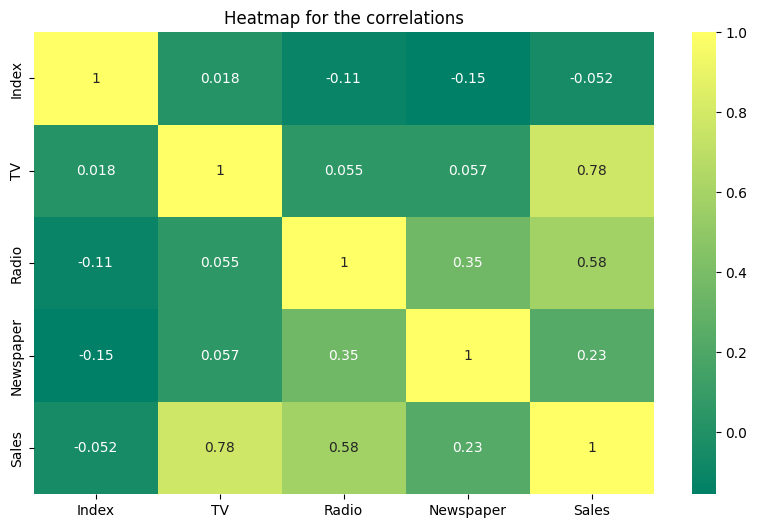

In [17]:
#heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")
plt.title("Heatmap for the correlations")
plt.show()

In [18]:
#splitting the datset into X,the attributes and y,the target variable
X=df.drop('Sales',axis=1)
y=df['Sales']

In [19]:
X

,Index,TV,Radio,Newspaper
0,1,230.1,37.8,69.2
1,2,44.5,39.3,45.1
2,3,17.2,45.9,69.3
3,4,151.5,41.3,58.5
4,5,180.8,10.8,58.4
...,...,...,...,...
195,196,38.2,3.7,13.8
196,197,94.2,4.9,8.1
197,198,177.0,9.3,6.4
198,199,283.6,42.0,66.2


In [20]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [21]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

In [22]:
print("X_train:")
print(X_train)

print("\nX_test:")
print(X_test)

print("\ny_train:")
print(y_train)

print("\ny_test:")
print(y_test)


X_train:
     Index     TV  Radio  Newspaper
134    135   36.9   38.6       65.6
66      67   31.5   24.6        2.2
26      27  142.9   29.3       12.6
113    114  209.6   20.6       10.7
168    169  215.4   23.6       57.6
..     ...    ...    ...        ...
67      68  139.3   14.5       10.2
192    193   17.2    4.1       31.6
117    118   76.4    0.8       14.8
47      48  239.9   41.5       18.5
172    173   19.6   20.1       17.0

[160 rows x 4 columns]

X_test:
     Index     TV  Radio  Newspaper
18      19   69.2   20.5       18.3
170    171   50.0   11.6       18.4
107    108   90.4    0.3       23.2
98      99  289.7   42.3       51.2
177    178  170.2    7.8       35.2
182    183   56.2    5.7       29.7
5        6    8.7   48.9       75.0
146    147  240.1    7.3        8.7
12      13   23.8   35.1       65.9
152    153  197.6   23.3       14.2
61      62  261.3   42.7       54.7
125    126   87.2   11.8       25.9
180    181  156.6    2.6        8.3
154    155  187.8   21

# Model Building

**Linear Regression**

In [23]:
model= LinearRegression()

#fitting the model to the dataset
model.fit(X_train,y_train)

#predictions
y_predictions=model.predict(X_test)


# Lets evaluate the model for its accuracy using various metrics such as RMSE and R-Squared

print('MAE:',metrics.mean_absolute_error(y_predictions,y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_predictions,y_test)))
print('R-Squared',metrics.r2_score(y_predictions,y_test))

MAE: 1.4158480868317487
RMSE: 2.125203007295874
R-Squared 0.8283777385812956


**Decision Tree Regressor**

In [24]:

model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_tree.predict(X_test)


# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.8167499999999996
R-squared: 0.9422693958484728


**Random Forest Regressor**

In [25]:

# Initialize and train a random forest model
model_forest = RandomForestRegressor(random_state=42)
model_forest.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_forest.predict(X_test)

# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.07227195
R-squared: 0.9659265680538125


**Gradient Boosting Regressor**

In [26]:

# Initialize and train a gradient boosting model
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_gb.predict(X_test)

# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9617406688691392
R-squared: 0.9694389047194665


**Support Vector Regressor**

In [27]:

# Initialize and train an SVM regression model
model_svm = SVR(kernel='linear')  # You can choose different kernel functions like 'rbf' for non-linear relationships
model_svm.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model_svm.predict(X_test)

# Evaluate the model (you can use different evaluation metrics)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.035740722634097
R-squared: 0.8399799893941851
